<h1>Лабораторная работа №3. Регрессионный анализ</h1>

In [1]:
import scipy.stats as sps
import numpy as np
import random
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression
from scipy.linalg import qr
import matplotlib.pyplot as plot
import pylab
from scipy.stats import norm, chi2, chisquare

In [2]:
def LinReg(meansV, covM, countV, b0=True):
    values = np.random.default_rng().multivariate_normal(meansV, covM, countV)
    data = pd.DataFrame(values, columns=['x1', 'x2', 'x3'])

    row = random.randint(0, count - 1)
    data2 = data.iloc[row]
    data1 = data.drop(row)
    
    x1 = data1['x1']
    x23 = data1.drop('x1', axis=1)

    model = LinearRegression(fit_intercept=b0).fit(x23, x1)
    ta0 = model.intercept_
    ta2 = model.coef_[0]
    ta3 = model.coef_[1]
    
    comp = ta0 + data2['x2'] * ta2 + data2['x3'] * ta3
    error = (data2['x1'] - comp) ** 2
    
    return error 

<h2>Основные задания</h2>
<blockquote>
<i>
1. Смоделируйте выборку объема N = 101 из трехмерного нормального закона распределения.
Параметры распределения должны генерироваться случайно из некоторого неконечного множества
(само множество и способ генерации вы должны придумать сами (+0,5 балла за оригинальность)).
Все компоненты случайного вектора должны быть коррелированны. Для генерации можно
использовать любую встроенную для этих целей функцию. (+0,5 балла, если придумаете и
реализуете «оригинальный» метод, использующий только генерацию одномерных нормальных
случайных величин). Т.е. фактически в этом пункте 2 задания: а) генерация параметров
распределения; б) генерация многомерного нормального распределения с заданными параметрами.
</i>
</blockquote>

True
           x1        x2        x3
0   -1.116873  1.011336 -0.307831
1   -1.838305  0.205435 -0.366888
2   -1.217478  1.314908 -0.553862
3    0.746236  1.882822  0.283299
4   -0.655525  1.303751 -0.365169
..        ...       ...       ...
96  -0.308070  0.778355 -0.289983
97  -0.286415  0.722120 -0.352216
98  -1.314454  0.217452 -0.272374
99  -1.781446  1.151523 -0.273028
100 -0.793509 -0.460422 -0.388275

[101 rows x 3 columns]


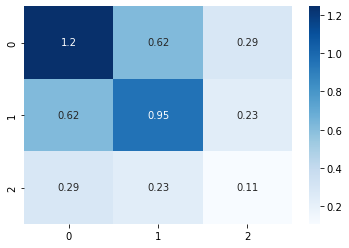

In [3]:
count = 101
N = 3
left = -1
right = 1
means = []

for i in range(N):
    means.append(random.uniform(left, right))

#Q, R = qr(np.random.rand(N, N))    
#ncov = Q * np.diag(means) * Q.T

MR = np.random.rand(N, N)
cov = np.dot(MR, MR.transpose())

#st = np.mgrid[1:4, 1:4]
#s, t = st
#cov = st.min(axis=0) + s * t * random.random()

sb.heatmap(cov, cmap="Blues", annot=True)

print(np.all(np.linalg.eigvals(cov) > 0))

values = np.random.default_rng().multivariate_normal(means, cov, count)
data = pd.DataFrame(values, columns=['x1', 'x2', 'x3'])

print(data)

<AxesSubplot:>

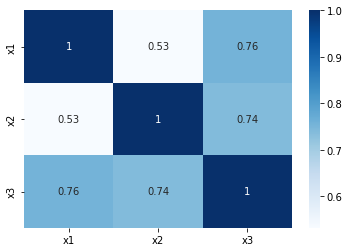

In [4]:
sb.heatmap(data.corr(), cmap="Blues", annot=True)

<blockquote>
<i>
2. Случайным образом удалить из выборки одно трехмерное наблюдение и сохранить отдельно.
</i>
</blockquote>

In [5]:
row = random.randint(0, count)
data2 = data.iloc[row]
data1 = data.drop(row)

<blockquote>
<i>
3. Обозначим компоненты сгенерированного нормального вектора как (x1, x2, x3). Предположим,
что имеет место модель линейной регрессии: x1 = a0 + a2x2 + a3x3 + u, где u – независимые в
совокупности нормально распределенные ошибки (остатки, residuals). Оценить коэффициенты
линейной регрессии a0, a2, a3, математическое ожидание и дисперсию ошибки u. (Можно
использовать готовые методы)
</i>
</blockquote>

In [6]:
x1 = data1['x1']
x23 = data1.drop('x1', axis=1)


model = LinearRegression().fit(x23, x1)
a0 = model.intercept_
a2 = model.coef_[0]
a3 = model.coef_[1]

predict = a0 + (a2 * x23['x2'] + a3 * x23['x3'])
residuals = x1 - predict

df = pd.DataFrame([a0, a2, a3],
                  index=pd.Index(['a0', 'a2', 'a3']),
                  columns=['x1 = a0 + a2x2 + a3x3 + u'])
df.style

,x1 = a0 + a2x2 + a3x3 + u
a0,0.170957
a2,-0.071960
a3,2.670202


In [7]:

df = pd.DataFrame([residuals.mean(), residuals.var()],
                  index=pd.Index(['Математическое ожидание', 'Дисперсия']),
                  columns=['Остатки'])
df.style

,Остатки
Математическое ожидание,0.000000
Дисперсия,0.484838


<blockquote>
<i>
4. Для отдельно сохраненного вектора, по компонентам x2 и x3, используя модель линейной
регрессии, спрогнозировать компоненту x1. Найти квадрат разности точного значения этой
компоненты и прогноза (квадрат ошибки).
</i>
</blockquote>

In [8]:
comp = a0 + data2['x2'] * a2 + data2['x3'] * a3
error = (data2['x1'] - comp) ** 2

df = pd.DataFrame([data2['x1'], comp, error],
                  index=pd.Index(['Точное значение', 'Пронозируемое значение', 'Квадрат ошибки']),
                  columns=[' '])
df.style

,
Точное значение,-0.541710
Пронозируемое значение,-1.433469
Квадрат ошибки,0.795234


<blockquote>
<i>
5. Повторить шаги 1-4 M = 100 раз. На каждой итерации на первом шаге использовать одни и те
же параметры. Насколько «хорошо» прогнозируется значение x1. Усреднить квадрат ошибки
(получим среднеквадратичную ошибку прогнозирования). Сделать выводы.
</i>
</blockquote>

In [9]:
M = 100
errors = []

for i in range(M):
    errors.append(LinReg(means, cov, count))

print(np.mean(errors))

0.524241033128108


<h2>Дополнительные задания.Разное</h2>
<blockquote>
<i>
6. (+1 балл) Найти истинные коэффициенты регрессии модели из пункта 3, сравнить
полученные результаты.
</i>
</blockquote>

In [10]:
a22 = (cov[1][0] * cov[2][2] - cov[2][0] * cov[1][2]) / (cov[1][1] * cov[2][2] - (cov[1][2]) ** 2)
a33 = (cov[2][0] * cov[1][1] - cov[1][0] * cov[2][1]) / (cov[2][2] * cov[1][1] - (cov[2][1]) ** 2)
a00 = means[0] - a22 * means[1] - a33 * means[2]

df = pd.DataFrame([[a0, a00], [a2, a22], [a3, a33]],
                  index=pd.Index(['a0', 'a2', 'a3']),
                  columns=['Оценённые', 'Истинные'])
df.style

,Оценённые,Истинные
a0,0.170957,0.187360
a2,-0.071960,-0.017471
a3,2.670202,2.692814


<blockquote>
<i>
7. (+0,5 балла) Предположим, что имеет место модель линейной регрессии: x1 = a2x2 + a3x3 + u,
где u – независимые в совокупности нормально распределенные ошибки (остатки, residuals). Оценить
коэффициенты линейной регрессии a2, a3, математическое ожидание и дисперсию ошибки u.
Сравнить полученные результаты с результатами пункта 3. Сравнить среднеквадратическую ошибку
прогнозирования в этом случае с ошибкой из пункта 5.
</i>
</blockquote>

In [11]:
model = LinearRegression(fit_intercept=False).fit(x23, x1)
a0 = model.intercept_
a2 = model.coef_[0]
a3 = model.coef_[1]

predict = a0 + (a2 * x23['x2'] + a3 * x23['x3'])
residualsN = x1 - predict

df = pd.DataFrame([a0, a2, a3],
                  index=pd.Index(['a0', 'a2', 'a3']),
                  columns=['x1 = a0 + a2x2 + a3x3 + u'])
df.style

,x1 = a0 + a2x2 + a3x3 + u
a0,0.000000
a2,0.010932
a3,2.384093


In [12]:
df = pd.DataFrame([[residuals.mean(), residualsN.mean()], [residuals.var(), residualsN.var()]],
                  index=pd.Index(['Математическое ожидание', 'Дисперсия']),
                  columns=['b0', 'b0 = 0'])
df.style

,b0,b0 = 0
Математическое ожидание,0.000000,0.029413
Дисперсия,0.484838,0.489043


In [13]:
M = 100
errors1 = []
errors2 = []

for i in range(M):
    errors1.append(LinReg(means, cov, count, True))
    errors2.append(LinReg(means, cov, count, False))

df = pd.DataFrame([np.mean(errors1), np.mean(errors2)],
                  index=pd.Index(['b0', 'b0 = 0']),
                  columns=['Среднеквадратическая ошибка'])
df.style

,Среднеквадратическая ошибка
b0,0.553555
b0 = 0,0.438404


<h2>Графики</h2>
<blockquote>
<i>
8. (+1 балл) Сгенерировать выборку из пункта 1. На графике изобразить диаграмму рассеяния
компонент x1 и x2. Предположим, что имеет место модель линейной регрессии: x1 = a0 + a2x2 + u.
Оценить коэффициенты данной модели. Построить на графике линию регрессии x1 = a0 + a2x2.
</i>
</blockquote>

<AxesSubplot:xlabel='x2', ylabel='x1'>

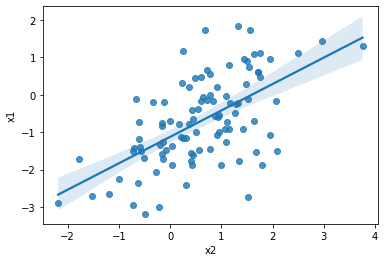

In [14]:
values = np.random.default_rng().multivariate_normal(means, cov, count)
data = pd.DataFrame(values, columns=['x1', 'x2', 'x3'])

row = random.randint(0, count - 1)
data2 = data.iloc[row]
data1 = data.drop(row)
tdata = data.drop('x3', axis=1)
    
x1 = data1['x1']
x2 = np.array(data1['x2']).reshape(-1 ,1)

model = LinearRegression().fit(x2, x1)
a0 = model.intercept_
a2 = model.coef_[0]

sb.regplot(x=data['x2'], y=data['x1'])

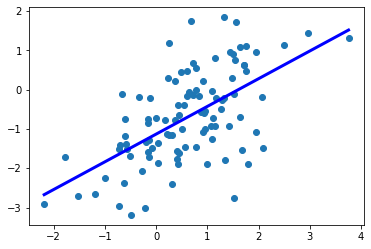

In [15]:
x22 = [data['x2'].min(), data['x2'].max()]
x11 = [a0+a2*x22[0], a0+a2*x22[1]]

plot.scatter(data['x2'], data['x1'])
plot.plot(x22, x11, color="blue", linewidth=3)
plot.show()

<blockquote>
<i>
9. (+0,5 балла) Для остатков модели из пункта 8 (или пункта 3) построить q-q plot. Разобраться,
что на нем изображается и дать содержательную интерпретацию того, что получилось в вашем
случае.
</i>
</blockquote>

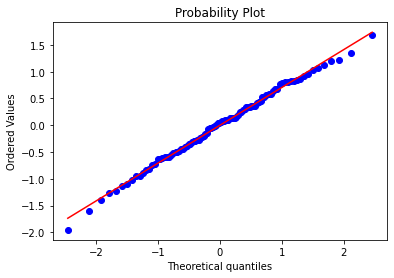

In [16]:
sps.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<h2>Хи-квадрат критерий Пирсона</h2>
<blockquote>
<i>
10. (+2 балл) Реализовать хи-квадрат критерий Пирсона для проверки гипотезы о том, что
остатки модели из пункта 3 имеют нормальный закон распределения. Из встроенных функций
разрешается использовать только функции распределения (cdf), плотности (pdf) и функции для
вычисления квантилей различных законов распределений (quantiles).
</i>
</blockquote>

In [17]:
def pearson(data, k, test=False):
    mean = np.mean(data)
    var = np.var(data)
    binsize = (np.max(data) - np.min(data)) / k
    grid = [np.min(data)]
    
    while grid[-1] < np.max(data):
        grid.append(grid[-1] + binsize)
        
    empiric_probas = np.array([len(data[np.where((data >= grid[i]) &
                                                 (data < (grid[i+1] if i < k - 1 else grid[i+1] + 0.1)))])
                               for i in range(k)])
    
    true_probas = np.array([(norm.cdf(grid[i+1] if i < k-1 else np.inf, loc=mean, scale=np.sqrt(var)) -
                     norm.cdf(grid[i] if i > 0 else -np.inf, loc=mean, scale=np.sqrt(var))) * len(data)
                        for i in range(k)])
    
    statistic = np.sum((empiric_probas - true_probas) ** 2 / true_probas)
    
    if test:
        return chisquare(f_obs=empiric_probas, f_exp=true_probas, ddof=2)
    else:
        return statistic, chi2.sf(statistic, df = k - 3)

res = pearson(np.array(residuals), 4, test=False)
print(f"statistic = {res[0]}, p-value = {res[1]}")

statistic = 0.8841693887067447, p-value = 0.34706225476252917


<blockquote>
<i>
11. (+0,5 балла) Сравнить полученные результаты с результатами работы встроенного теста.
</i>
</blockquote>

In [18]:
print(pearson(np.array(residuals), 4, test=True))

Power_divergenceResult(statistic=0.8841693887067447, pvalue=0.34706225476252917)


<blockquote>
<i>
12. (+0,5 балла) Определить, для каких значений k числа интервалов нулевая гипотеза
принимается, для каких отвергается (k изменять от 3 до 50).
</i>
</blockquote>

k = 4, pvalue = 0.34706225476252917


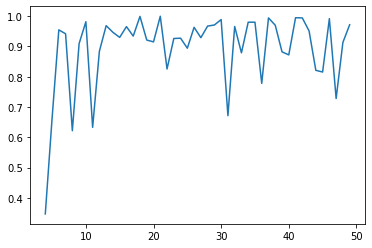

In [19]:
res = []
ps = list(range(3, 50))
for k in ps:
    res.append(pearson(np.array(residuals), k)[1])

mel = min(res[1:])
print(f'k = {res.index(mel) + 3}, pvalue = {mel}')
plot.plot(ps ,res)

<h2>Графики</h2>
<blockquote>
<i>
8. (+1 балл) Сгенерировать выборку из пункта 1. На графике изобразить диаграмму рассеяния
компонент x1 и x2. Предположим, что имеет место модель линейной регрессии: x1 = a0 + a2x2 + u.
Оценить коэффициенты данной модели. Построить на графике линию регрессии x1 = a0 + a2x2.
</i>
</blockquote><h2>Переобучение (over fitting)</h2>
<blockquote>
<i>
13. (+1 балл). Сгенерировать M выборок из двумерного нормального закона распределения
объема N с нулевым математическим ожиданием и недиагональной матрицей ковариации. В каждой
выборке случайным образом выбрать 10% наблюдений, которые исключаются из выборки и
хранятся отдельно (проверочные выборки). По оставшимся наблюдениям оценить коэффициенты
регрессии для фиксированного параметра p. Спрогнозировать
значения x1 для проверочных выборок и найти среднеквадратическую ошибку прогнозирования
(усреднение идет по объему проверочной выборки и по M). Изучить, как изменяется
среднеквадратическая ошибка прогнозирования в зависимости от p.
</i>
</blockquote>

In [20]:
def dataGen(M, N, mean=[0, 0]):
    data = []
    
    MR = np.random.rand(2, 2)
    cov = np.dot(MR, MR.transpose())

    for i in range(M):
        values = np.random.default_rng().multivariate_normal(mean, cov, N)
        data.append(pd.DataFrame(values, columns=['x1', 'x2']))
    return data

def overFitting(data, p, prop):
    sliced = []

    for el in data:
        temp = pd.DataFrame()
        for i in range(int(len(el)*prop)):
            row = random.randint(0, len(el) - 1)
            temp = temp.append([el.iloc[row]])
            el = el.drop(row, axis=0)
            el = el.reset_index(drop=True)
        temp = temp.reset_index(drop=True)
        sliced.append(temp)
    
    residmeans = []
    for V, S in zip(data, sliced):
        x2 = V['x2']
        degs = pd.DataFrame(V['x2'])
        SLdegs = pd.DataFrame(S['x2'])
        for i in range(2, p):
            temp = []
            stemp = []
            for el in x2:
                temp.append(el ** i)
            for el in S['x2']:
                stemp.append(el ** i)
            SLdegs[f'p{i}'] = stemp
            degs[f'p{i}'] = temp
        
        model = LinearRegression().fit(degs, V['x1'])
        predict = model.predict(SLdegs)
        resid = S['x1'] - predict
        residmeans.append(np.mean(resid) ** 2)

    return np.mean(residmeans)
    
print(overFitting(dataGen(10, 100), 5, 0.1))

0.01085097315944909


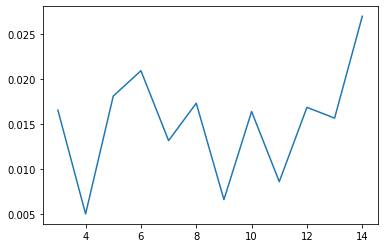

In [21]:
ps = list(range(3, 15))

resArray = []
ndata = dataGen(10, 100)

for pl in ps:
    resArray.append(overFitting(ndata, pl, 0.1))
    
plot.plot(ps ,resArray)

<blockquote>
<i>
14. (+0,5 балла) Для первой выборки построить несколько диаграмм рассеяния. На них
изобразить линии регрессии при различных значениях p.
</i>
</blockquote>

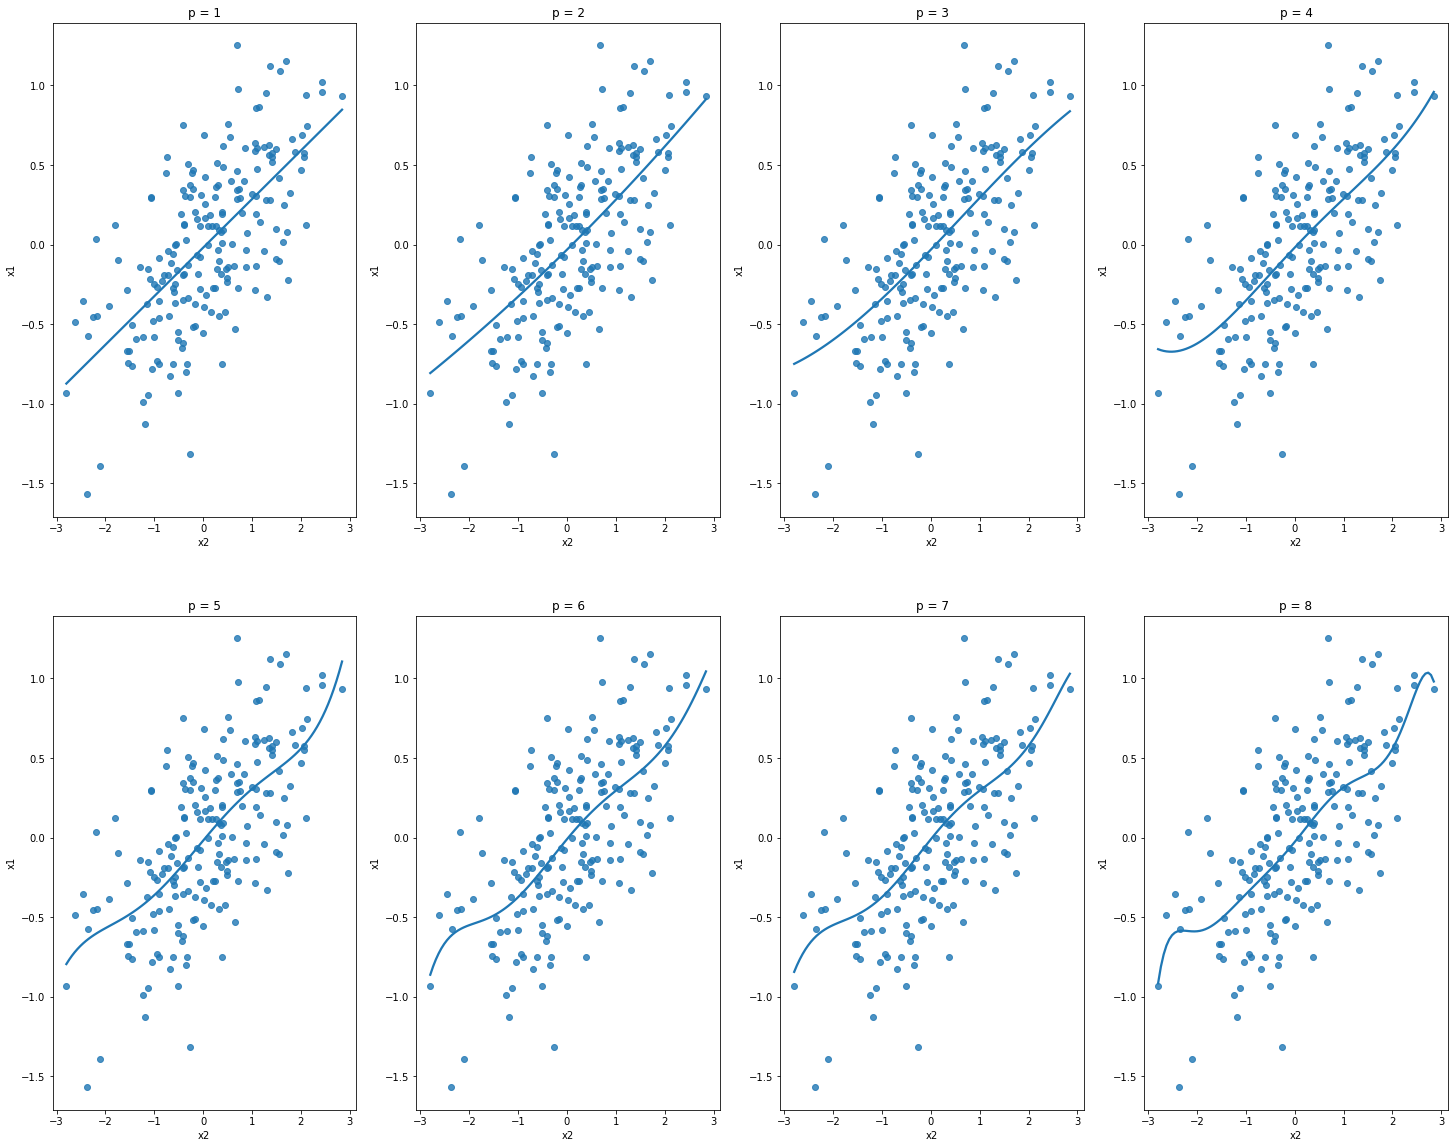

In [22]:
w = 2
h = 4
fig, axes = plot.subplots(2, h, figsize=(25, 20))

data = dataGen(1, 200)[0]
count = 0
for i in range(0, w):
    for j in range(0, h):
        count += 1
        sb.regplot(ax=axes[i, j], x=data['x2'], y=data['x1'], order = count, ci=False)
        axes[i, j].set_title(f'p = {count}')